


NEURAL NETWORK
--------------
Best Params:	{"max_depth": 32, "max_features": 2, "min_samples_split": 19}
Avg Precision:	0.73
Avg Recall:	0.74
Avg F1_Score:	0.73
Accuracy Score:	0.74





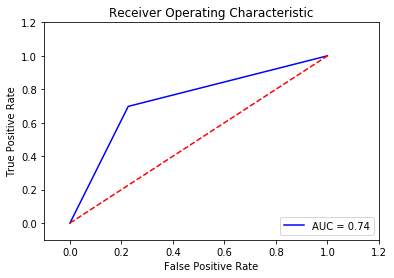

In [3]:
from os import sys
import pandas as pd
import json

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

from sklearn.tree import DecisionTreeClassifier


########### READ DATA ##############

# data = sys.argv[1]
data = "./titanic_data/train.csv"
df = pd.read_csv(data, header=0)
# print(df)



########### CLEAN DATA ##############

# df = df.dropna()

# remove name
df.drop(['Name'], axis=1)

# convert sex to number
le = preprocessing.LabelEncoder()
le.fit(df['Sex'])
df['Sex'] = le.transform(df['Sex'])

# fill age missing values
df['Age'] = df['Age'].fillna('0')

# convert ticket to number
le = preprocessing.LabelEncoder()
le.fit(df['Ticket'])
df['Ticket'] = le.transform(df['Ticket'])

# remove cabin for now
## don't include it below

# convert embarked to number
le = preprocessing.LabelEncoder()
le.fit(df['Embarked'].fillna('0'))
df['Embarked'] = le.transform(df['Embarked'].fillna('0'))
# le.fit(df['Embarked'])
# df['Embarked'] = le.transform(df['Embarked'])


########### SPLIT DATA ##############

X = df[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)




############# PARAMETER TUNING & TRAIN MODEL ###############

tuned_parameters_dt = [{'max_depth': [1, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                     'max_features': [2, 9]}
                    ]
clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters_dt, scoring='accuracy', cv=5)
clf.fit(X_train, y_train)
best = json.dumps(clf.best_params_)



############# PERFORMANCE EVALUATION ###############

y_true, y_pred = y_test, clf.predict(X_test)
avg_prec = round(precision_score(y_true, y_pred, average='macro'), 2)
avg_recall = round(recall_score(y_true, y_pred, average='macro'), 2)
avg_f1 = round(f1_score(y_true, y_pred, average='macro'), 2)
acc_score = round(accuracy_score(y_true, y_pred), 2)

print("\n\n")
print("NEURAL NETWORK")
print("--------------")
print("Best Params:\t" + best)
print("Avg Precision:\t"+ str(avg_prec))
print("Avg Recall:\t"+ str(avg_recall))
print("Avg F1_Score:\t"+ str(avg_f1))
print("Accuracy Score:\t"+ str(acc_score))
print("\n\n")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()